## Numpy продолжение

In [5]:
import numpy as np

#### Суммирование значений

In [7]:
rng = np.random.default_rng(1)
s = rng.random(50)

print(s)

[0.51182162 0.9504637  0.14415961 0.94864945 0.31183145 0.42332645
 0.82770259 0.40919914 0.54959369 0.02755911 0.75351311 0.53814331
 0.32973172 0.7884287  0.30319483 0.45349789 0.1340417  0.40311299
 0.20345524 0.26231334 0.75036467 0.28040876 0.48519097 0.9807372
 0.96165719 0.72478994 0.54122686 0.2768912  0.16065201 0.96992541
 0.51606859 0.11586561 0.62348976 0.77668311 0.6130033  0.9172977
 0.03959288 0.52858926 0.45933588 0.06234958 0.64132817 0.85263284
 0.59294102 0.26009745 0.83988152 0.50949588 0.51088888 0.75303021
 0.14792204 0.81962672]


In [9]:
print(sum(s), np.sum(s))

25.985704258037675 25.98570425803768


In [15]:
#нампи может считать сумму многомерных массивов
a = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
])
print(np.sum(a))
print(np.sum(a, axis=0)) #0 - столбцы, 1 - строки
print(np.sum(a, axis=1))

55
[ 7  9 11 13 15]
[15 40]


In [17]:
print(np.min(a))
print(np.min(a, axis=0)) 
print(np.min(a, axis=1))

print(np.max(a))
print(np.max(a, axis=0)) 
print(np.max(a, axis=1))

1
[1 2 3 4 5]
[1 6]
10
[ 6  7  8  9 10]
[ 5 10]


In [19]:
#если нужно использовать агрегирующие ф-ии на массивах с NaN:
print(np.nanmin(a))
print(np.nanmin(a, axis=0)) 
print(np.nanmin(a, axis=1))

1
[1 2 3 4 5]
[1 6]


#### Транслирование (broadcasting)
Набор правил, которые позволяют осуществлять бинарные операции с массивами разных форм и размеров

In [26]:
a = np.array([0., 1., 2.])
b = np.array([5, 5, 5])
print(a + b)
print(a + 5) #пятерка транслируется в [5, 5, 5]

[5. 6. 7.]
[5. 6. 7.]


In [30]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a + 5)

[[ 6  7  8]
 [ 9 10 11]]


In [32]:
a = np.array([0, 1, 2])
b = np.array([[0], [1], [2]])
print(a + b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


Правила:
1) Если размерности массивов отличаются, то форма массива с меньшей размерностью дополняется единицей с левой стороны

In [41]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([5])
print(a.ndim, a.shape)
print(b.ndim, b.shape)
#b (1,) -> (1, 1)

2 (2, 3)
1 (1,)


2. Если формы массивов не совпадают в каком-то измерении, то если у массива форма равна 1, то он растягивается до соответствия

In [44]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([5])
print(a.ndim, a.shape)
print(b.ndim, b.shape)
#b (1,) -> (1, 1)

2 (2, 3)
1 (1,)


3. Если в каком-либо измерении размеры отличаются и ни один из них не равен 1, то генерируется ошибка 

In [53]:
a = np.ones((2, 3))
b = np.arange(3)
print(a)
print(b)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


In [55]:
print(a.ndim, a.shape)
print(b.ndim, b.shape)

2 (2, 3)
1 (3,)


In [57]:
# 1 шаг: (3,) -> (1, 3), (2, 3) - без изменений
# 2 шаг: (1, 3) -> (2, 3), (2, 3) - без изменений
c = a + b
print(c.shape)

(2, 3)


In [59]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


In [61]:
print(a.ndim, a.shape)
print(b.ndim, b.shape)

2 (3, 1)
1 (3,)


In [65]:
#(3, 1) -> (3, 3)
#(3, 1) -> (1, 3) -> (3, 3)
c = a + b
print(c.shape)

(3, 3)


In [67]:
x = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9], 
              [9, 8, 7, 6, 5, 4, 3, 2, 1]])
Xmean = x.mean(0)
print(Xmean)

[5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [69]:
Xcenter = x - Xmean
print(Xcenter)

[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]


In [71]:
Xmean = x.mean(1)
print(Xmean)

[5. 5.]


In [75]:
Xcenter1 = x - Xmean #ошибка
print(Xcenter1)

ValueError: operands could not be broadcast together with shapes (2,9) (2,) 

In [77]:
Xmean1 = Xmean[:, np.newaxis]
Xcenter1 = x - Xmean1
print(Xcenter1)

[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]


In [81]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 3 + np.cos(20 + y * x) * np.sin(y)

print(z.shape)

(50, 50)


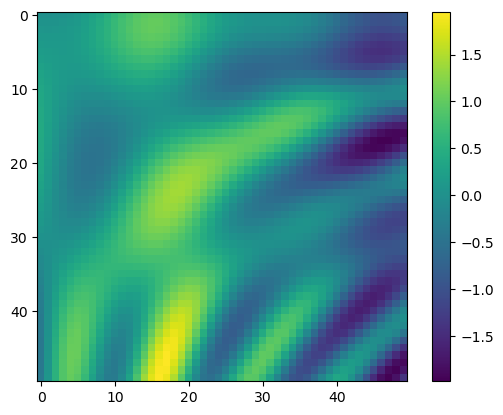

In [85]:
import matplotlib.pyplot as plt
plt.imshow(z)
plt.colorbar()
plt.show()

In [89]:
x = np.array([1, 2, 3, 4, 5])
print(x < 3)
print(np.less(x, 3))

[ True  True False False False]
[ True  True False False False]


In [91]:
#False = 0
#True = 1
print(np.sum(x < 3))

2


In [103]:
y = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(y < 3)
print(np.sum(y < 4, axis=0))
print(np.sum(y < 4, axis=1))

[[ True  True False False False]
 [False False False False False]]
[1 1 1 0 0]
[3 0]


#### Маски - булевы массивы

In [106]:
x = np.array([1, 2, 3, 4, 5])
y = print(x < 3)

[ True  True False False False]


In [110]:
print(x[x < 3])

[1 2]


In [112]:
print(bin(42))
print(bin(59))
print(bin(42 & 59))

0b101010
0b111011
0b101010


#### Векторизация индекса

In [116]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
index = [1, 5, 7]
print(a[index])

[1 5 7]


In [118]:
index = [[1, 5, 7], [2, 4, 8]]
print(a[index])

[[1 5 7]
 [2 4 8]]


In [130]:
x = np.arange(12).reshape((3, 4))
print(x)
print(x[2, [2, 0, 1]])
print(x[1:, [2, 0, 1]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[10  8  9]
[[ 6  4  5]
 [10  8  9]]


In [134]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
print(x)
x[i] = 999
print(x)

[0 1 2 3 4 5 6 7 8 9]
[  0 999 999   3 999   5   6   7 999   9]


#### Сортировка

In [141]:
x = [3, 2, 3, 10, 2, 5, 6, 8]
print(sorted(x))
print(np.sort(x))

[2, 2, 3, 3, 5, 6, 8, 10]
[ 2  2  3  3  5  6  8 10]


In [147]:
data =np.zeros(4, dtype={
    'names': ('name', 'age'),
    'formats': ('U10', 'i4')
})
print(data.dtype)

[('name', '<U10'), ('age', '<i4')]


In [155]:
name = np.array(['name1', 'name2', 'name3', 'name4'])
age = np.array([10, 20, 30, 40])
data['name'] = name
data['age'] = age
print(data)
print(data[age > 20])

[('name1', 10) ('name2', 20) ('name3', 30) ('name4', 40)]
[('name3', 30) ('name4', 40)]


#### Массивы записей

In [158]:
data_rec = data.view(np.recarray)
print(data_rec)
print(data_rec[0])

[('name1', 10) ('name2', 20) ('name3', 30) ('name4', 40)]
('name1', 10)
